In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN

In [2]:
finch_data_2012 = "finch_beaks_2012.csv"
finch_data_1975 = "finch_beaks_1975.csv"

finch_2012_df = pd.read_csv(filepath_or_buffer=finch_data_2012)
finch_1975_df = pd.read_csv(filepath_or_buffer=finch_data_1975)
finch_1975_df.columns = finch_2012_df.columns

In [5]:
finch_1975_df.columns

Index(['band', 'species', 'blength', 'bdepth'], dtype='object')

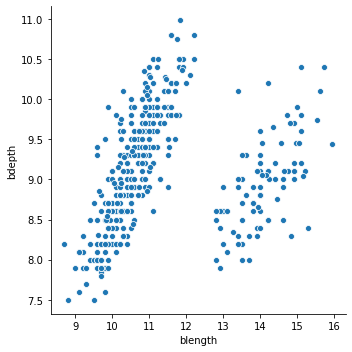

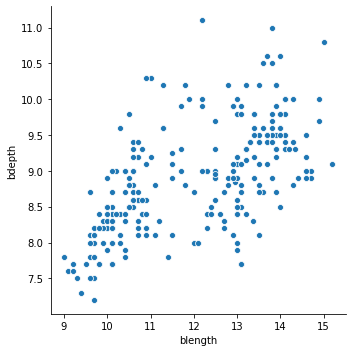

In [6]:
sns.relplot(x="blength", y="bdepth", data=finch_1975_df)
sns.relplot(x="blength", y="bdepth", data=finch_2012_df)

In [7]:
# Lets prepare out data for clustering by pairing out blength and bdepth columns into a single column repsrsenting a point in 2D space.
finch_2012_beak_points = list(zip(finch_2012_df["blength"], finch_2012_df["bdepth"]))
finch_1975_beak_points = list(zip(finch_1975_df["blength"], finch_1975_df["bdepth"]))
finch_1975_df["beak_points"] = finch_1975_beak_points
finch_2012_df["beak_points"] = finch_2012_beak_points


In [8]:
finch_1975_df["beak_points"] 

0         (9.4, 8.0)
1         (9.2, 8.3)
2         (9.5, 7.5)
3         (9.5, 8.0)
4        (11.5, 9.9)
           ...      
398    (14.55, 9.45)
399    (14.05, 9.05)
400    (14.45, 8.75)
401    (15.05, 9.45)
402    (13.25, 8.35)
Name: beak_points, Length: 403, dtype: object

In [9]:
# Cluster time!
finch_1975_df["cluster"] = DBSCAN().fit(finch_1975_beak_points).labels_
finch_2012_df["cluster"] = DBSCAN().fit(finch_2012_beak_points).labels_
print(finch_1975_df.head())
print()
print(finch_2012_df.head())

   band species  blength  bdepth  beak_points  cluster
0     2  fortis      9.4     8.0   (9.4, 8.0)        0
1     9  fortis      9.2     8.3   (9.2, 8.3)        0
2    12  fortis      9.5     7.5   (9.5, 7.5)        0
3    15  fortis      9.5     8.0   (9.5, 8.0)        0
4   305  fortis     11.5     9.9  (11.5, 9.9)        0

    band species  blength  bdepth  beak_points  cluster
0  19022  fortis     10.0     8.5  (10.0, 8.5)        0
1  19028  fortis     12.5     8.9  (12.5, 8.9)        0
2  19032  fortis      9.3     7.5   (9.3, 7.5)        0
3  19041  fortis     10.3     9.6  (10.3, 9.6)        0
4  19044  fortis     11.0     9.2  (11.0, 9.2)        0


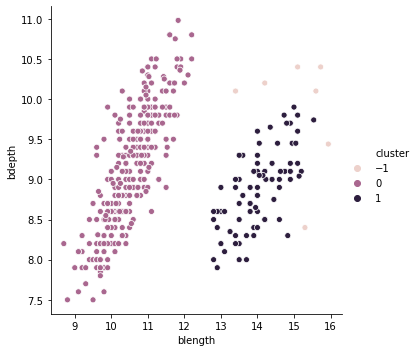

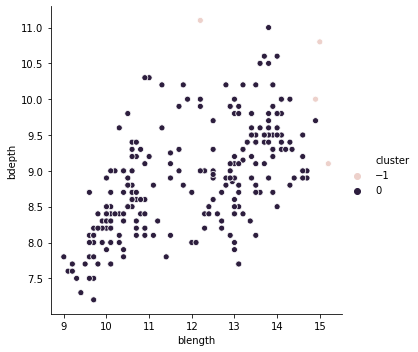

In [10]:
sns.relplot(x="blength", y="bdepth", hue="cluster", data=finch_1975_df)
sns.relplot(x="blength", y="bdepth", hue="cluster", data=finch_2012_df)